#### 1.Which local authorities manage the most number of different roads (not links)?
1    ##统计region_id的road_name, count

#### 2.Which road is the longest (assuming that every link (section) of that road is associated to a counting point in the data)? Which road has the most number of different counting points along it?
2    ## count对于每个road_name的不同的count_point的数量，以及相应count_point的length_km的求和

#### 3. Look on a road map for the major roads coming into Edinburgh (for example, find the A roads joining the City Bypass). These roads are taken, for example, by people living outside the city and driving to work. Can you identify patterns of traffic on these roads depending on the time of day and direction of travel?
8. ## 根据路线图，查看进入爱丁堡的道路的MABCU道路数字，然后分析和谐道路可能的交通方式
#### 大概就是对于major road in city of Edinburgh，分析traffic flow based on hours
### 考虑一下热力图的分布or more questions？

#### 4.To a rough approximation, the border between Scotland and England almost forms a straight line between coordinates (latitude, longitude)  (55.0,−3.0)  and  (55.81,−2.03) . Using this information (or another method), find the closest count points to the border, and estimate, on average, how many heavy goods vehicles cross the border every day.
9. ##找到最接近  (latitude, longitude)  (55.0,−3.0)  and  (55.81,−2.03)的计数点(count_point_id)，然后统计经过这些count_point_id的重型卡车（all_hgvs）数量

#### 5.Think about how you could map or visualise the roads/places where people most use bikes, where most buses and coaches drive, where the biggest trucks can and can't drive in or around big cities, etc...

10. ## visualise the roads /places,用地图，接https://www.openstreetmap.org/ 接口，

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


In [37]:
dft=pd.read_csv("dft_rawcount_region_id_3.csv", dtype={'start_junction_road_name':'string','end_junction_road_name':'string'})

In [10]:
dft[dft['road_type']=='Major']##做一下关于'hour'和各种交通方式''的分布

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
183,1153,W,2019,2019-10-04,13,3,Scotland,30,Falkirk,A905,...,1,89,14,11,0,7,27,16,75,593
184,1153,W,2019,2019-10-04,9,3,Scotland,30,Falkirk,A905,...,2,98,14,9,2,8,29,18,80,562
185,1153,W,2019,2019-10-04,18,3,Scotland,30,Falkirk,A905,...,0,47,3,1,1,0,8,4,17,561
186,1153,E,2019,2019-10-04,12,3,Scotland,30,Falkirk,A905,...,1,42,12,5,0,2,13,8,40,287
187,1153,W,2019,2019-10-04,15,3,Scotland,30,Falkirk,A905,...,3,136,9,8,1,1,33,11,63,816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276859,80605,W,2000,2000-04-11,14,3,Scotland,32,Fife,M90,...,36,41,89,8,3,0,0,0,100,542
276860,80605,W,2000,2000-04-11,15,3,Scotland,32,Fife,M90,...,32,42,98,4,2,2,0,0,106,680
276861,80605,W,2000,2000-04-11,16,3,Scotland,32,Fife,M90,...,30,128,46,5,5,1,1,0,58,889
276862,80605,W,2000,2000-04-11,17,3,Scotland,32,Fife,M90,...,21,74,28,5,4,0,4,0,41,1061


count_point_id                    int64
direction_of_travel              object
year                              int64
count_date                       object
hour                              int64
region_id                         int64
region_name                      object
local_authority_id                int64
local_authority_name             object
road_name                        object
road_type                        object
start_junction_road_name         string
end_junction_road_name           string
easting                           int64
northing                          int64
latitude                        float64
longitude                       float64
link_length_km                  float64
link_length_miles               float64
pedal_cycles                      int64
two_wheeled_motor_vehicles        int64
cars_and_taxis                    int64
buses_and_coaches                 int64
lgvs                              int64
hgvs_2_rigid_axle                 int64


,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,931907,N,2019,2019-06-17,18,3,Scotland,29,City of Edinburgh,U,...,5,20,0,0,0,0,0,0,0,317
1,931907,S,2019,2019-06-17,13,3,Scotland,29,City of Edinburgh,U,...,4,36,4,2,0,1,0,0,7,306
2,931907,N,2019,2019-06-17,9,3,Scotland,29,City of Edinburgh,U,...,5,44,5,2,0,1,0,0,8,328
3,931907,S,2019,2019-06-17,12,3,Scotland,29,City of Edinburgh,U,...,4,50,2,5,0,2,0,0,9,331
4,931907,S,2019,2019-06-17,10,3,Scotland,29,City of Edinburgh,U,...,8,35,2,3,0,3,0,0,8,298


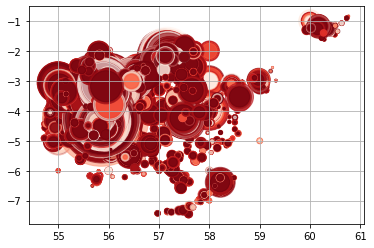

In [35]:
plt.scatter(dft['latitude'],dft['longitude'],  # 按照经纬度显示
            s = dft['cars_and_taxis'],  # 按照cars_and_taxis显示大小
            c = dft['hour'],  # 按照hour显示颜色
            alpha = 0.6, cmap = 'Reds')  
plt.grid()
print(dft.dtypes) ##reference:https://www.zhihu.com/question/33783546
print('-------\n数据长度为%i条' % len(dft))
dft.head()

In [23]:
def query_address(address):
    """Return response from open streetmap.
    
    Parameter:
    address - address of establishment
    
    Returns:
    result - json, response from open street map
    """
    
    url = "https://nominatim.openstreetmap.org/search"
    parameters = {'q':'{}, Edinburgh'.format(address), 'format':'json'}
    
    response = requests.get(url, params=parameters)
    # don't want to raise an error to not stop the processing
    # print address instead for future inspection
    if response.status_code != 200:
        print("Error querying {}".format(address))
        result = {}
    else:
        result = response.json()
    return result

#### 1.Which local authorities manage the most number of different roads (not links)?
1    ##统计region_id的road_name, count

#### 2.Which road is the longest (assuming that every link (section) of that road is associated to a counting point in the data)? Which road has the most number of different counting points along it?
2    ## count对于每个road_name的不同的count_point的数量，以及相应count_point的length_km的求和


In [81]:
dft_na=dft_clear[np.isnan(dft_clear['link_length_km'])]
dft_na

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_4_or_more_rigid_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,931907,N,2019,2019-06-17,18,3,Scotland,29,City of Edinburgh,U,...,5,20,0,0,0,0,0,0,0,317
24,967493,N,2019,2019-06-03,17,3,Scotland,46,Moray,B9009,...,0,6,1,0,0,0,0,0,1,23
48,931911,S,2019,2019-04-30,13,3,Scotland,3,Glasgow City,U,...,3,9,2,0,0,0,0,0,2,98
60,982114,S,2019,2019-09-09,18,3,Scotland,3,Glasgow City,U,...,0,7,0,1,0,0,0,0,1,118
63,931918,E,2019,2019-09-13,18,3,Scotland,37,South Lanarkshire,C,...,9,54,0,0,0,0,0,0,0,973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277404,951010,C,2000,2000-06-15,7,3,Scotland,35,Highland,B8004,...,0,0,0,0,0,0,0,0,0,3
277428,951053,E,2000,2000-06-06,7,3,Scotland,51,Aberdeen City,U,...,3,5,0,0,0,0,0,0,0,36
278688,983103,C,2000,2000-06-07,7,3,Scotland,45,Aberdeenshire,U,...,0,6,0,0,0,0,0,0,0,48
278892,990178,C,2000,2000-10-10,7,3,Scotland,44,Argyll & Bute,B8000,...,0,3,1,0,0,0,0,0,1,8


In [82]:
dft_clear=dft.drop_duplicates('count_point_id')## duplicates the same count_point
dft_1=dft_clear.groupby(['local_authority_name']).road_name.nunique()
dft_1.reset_index(name='counts')



,local_authority_name,counts
0,Aberdeen City,17
1,Aberdeenshire,37
2,Angus,21
3,Argyll & Bute,34
4,City of Edinburgh,28
5,Clackmannanshire,9
6,Comhairle nan Eilean Siar,14
7,Dumfries & Galloway,46
8,Dundee City,12
9,East Ayrshire,19


In [71]:
dft_2=dft_clear.groupby(['road_name']).link_length_km.sum()
dft_3=dft_2.reset_index(name='counts')
dft_3

,road_name,counts
0,A1,103.80
1,A1087,7.58
2,A1107,21.40
3,A1140,1.70
4,A198,36.10
...,...,...
490,M876,18.90
491,M898,1.60
492,M9,46.40
493,M90,54.60
